In [21]:
import geopandas 
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
%matplotlib inline

#Reference: Hayes, K. (2019, July 21). Tracking the international space station: A mini project with GeoPandas. Medium. Retrieved July 9, 2022, from https://medium.com/@katehayes.m51/tracking-the-international-space-station-a-mini-project-with-geopandas-e682e8a3489f 

In [2]:
ISS_loc = []
count = 0
while count <= 110:    
    
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    

    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
        
    else:
        
        resp = response.json()
        ISS_loc.append(resp)
        time.sleep(10)
        count = count + 1

In [3]:
ISS_loc

[{'timestamp': 1657371717,
  'iss_position': {'longitude': '19.3748', 'latitude': '-51.4464'},
  'message': 'success'},
 {'timestamp': 1657371727,
  'iss_position': {'longitude': '20.4136', 'latitude': '-51.3817'},
  'message': 'success'},
 {'timestamp': 1657371737,
  'iss_position': {'longitude': '21.4001', 'latitude': '-51.3107'},
  'message': 'success'},
 {'timestamp': 1657371748,
  'iss_position': {'longitude': '22.4319', 'latitude': '-51.2266'},
  'message': 'success'},
 {'timestamp': 1657371758,
  'iss_position': {'longitude': '23.4596', 'latitude': '-51.1326'},
  'message': 'success'},
 {'timestamp': 1657371768,
  'iss_position': {'longitude': '24.4342', 'latitude': '-51.0340'},
  'message': 'success'},
 {'timestamp': 1657371779,
  'iss_position': {'longitude': '25.4529', 'latitude': '-50.9211'},
  'message': 'success'},
 {'timestamp': 1657371789,
  'iss_position': {'longitude': '26.4663', 'latitude': '-50.7985'},
  'message': 'success'},
 {'timestamp': 1657371800,
  'iss_positi

In [4]:
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}

lat_list = []
long_list = []
time_list = []


for i in range(0,len(ISS_loc)):
    lat_list.append(ISS_loc[i]['iss_position']['latitude'])
    long_list.append(ISS_loc[i]['iss_position']['longitude'])
    time_list.append(ISS_loc[i]['timestamp'])


ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list


ISS_df = pd.DataFrame.from_dict(ISS_dict)

In [5]:
ISS_df

,latitude,longitude,timestamp
0,-51.4464,19.3748,1657371717
1,-51.3817,20.4136,1657371727
2,-51.3107,21.4001,1657371737
3,-51.2266,22.4319,1657371748
4,-51.1326,23.4596,1657371758
...,...,...,...
106,-11.7280,88.8116,1657372815
107,-11.2015,89.2068,1657372826
108,-10.6744,89.6004,1657372837
109,-10.1717,89.9739,1657372847


In [7]:
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)

In [8]:
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

In [9]:
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)

In [10]:
ISS_df.head()

,latitude,longitude,timestamp,coordinates
0,-51.4464,19.3748,1.657372e+09,POINT (19.3748 -51.4464)
1,-51.3817,20.4136,1.657372e+09,POINT (20.4136 -51.3817)
2,-51.3107,21.4001,1.657372e+09,POINT (21.4001 -51.3107)
3,-51.2266,22.4319,1.657372e+09,POINT (22.4319 -51.2266)
4,-51.1326,23.4596,1.657372e+09,POINT (23.4596 -51.1326)


In [11]:
geo_ISS = geopandas.GeoDataFrame(ISS_df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_ISS))
geo_ISS.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,latitude,longitude,timestamp,coordinates
0,-51.4464,19.3748,1.657372e+09,POINT (19.37480 -51.44640)
1,-51.3817,20.4136,1.657372e+09,POINT (20.41360 -51.38170)
2,-51.3107,21.4001,1.657372e+09,POINT (21.40010 -51.31070)
3,-51.2266,22.4319,1.657372e+09,POINT (22.43190 -51.22660)
4,-51.1326,23.4596,1.657372e+09,POINT (23.45960 -51.13260)


In [12]:
geo_ISS.to_csv('Geo_ISS_df')

In [14]:
earth = geopandas.read_file("custom.geo.json")
earth.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,"MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ..."
1,1,Admin-0 country,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Americas,Northern America,North America,6,6,4,-99,1,CAN.geojson,"MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ..."
2,1,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,...,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."
3,1,Admin-0 country,3,Cuba,CUB,0,2,Sovereign country,Cuba,CUB,...,Americas,Caribbean,Latin America & Caribbean,4,4,4,-99,1,CUB.geojson,"POLYGON ((-82.26815 23.18861, -81.40446 23.117..."
4,1,Admin-0 country,5,Dominican Republic,DOM,0,2,Sovereign country,Dominican Republic,DOM,...,Americas,Caribbean,Latin America & Caribbean,14,18,9,-99,1,DOM.geojson,"POLYGON ((-71.71236 19.71446, -71.58730 19.884..."


In [16]:
earth.describe

<bound method NDFrame.describe of      scalerank       featurecla  labelrank          sovereignt sov_a3  \
0            1  Admin-0 country          4         The Bahamas    BHS   
1            1  Admin-0 country          2              Canada    CAN   
2            1  Admin-0 country          6              Belize    BLZ   
3            1  Admin-0 country          3                Cuba    CUB   
4            1  Admin-0 country          5  Dominican Republic    DOM   
..         ...              ...        ...                 ...    ...   
170          1  Admin-0 country          3              France    FR1   
171          1  Admin-0 country          2         New Zealand    NZ1   
172          1  Admin-0 country          2    Papua New Guinea    PNG   
173          1  Admin-0 country          3     Solomon Islands    SLB   
174          1  Admin-0 country          4             Vanuatu    VUT   

     adm0_dif  level               type               admin adm0_a3  ...  \
0           0

In [17]:
earth.shape

(175, 65)

<AxesSubplot:>

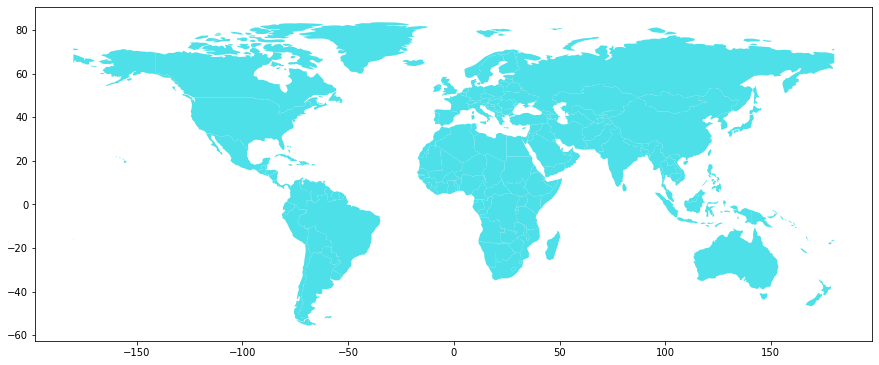

In [18]:

earth.plot(figsize=(15,10), color='#4DE0E8')

<AxesSubplot:>

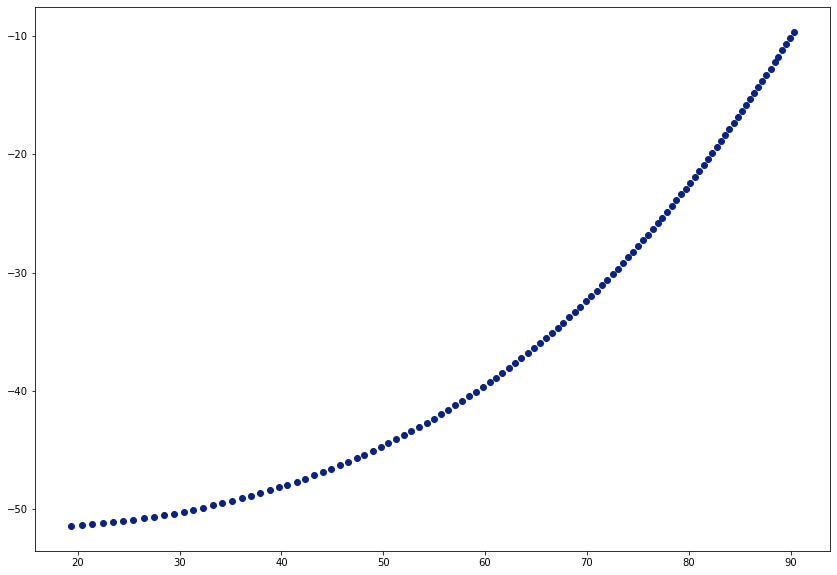

In [19]:
#Plot the ISS Path
geo_ISS.plot(figsize=(15,10), color='#0B2380')

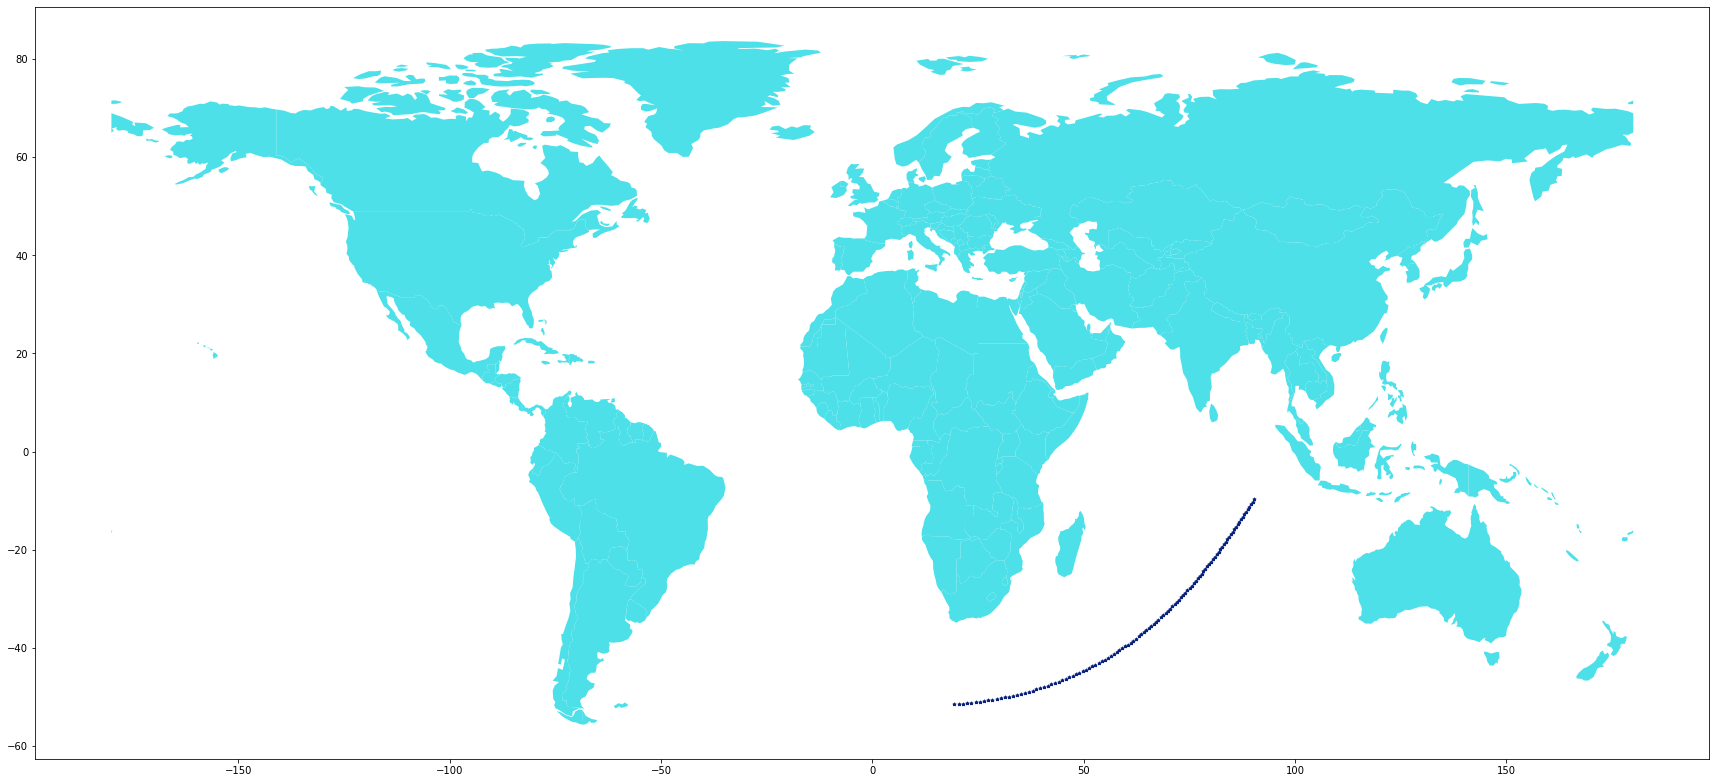

In [20]:
# Plotting to see the ISS overlay the world:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#4DE0E8')

# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, color='#0B2380', marker="*", markersize=10);

In [ ]:
#Ref